# Run YOLO V3 on Colab for images/videos

Hello there,

Today, we will be discussing about how can we use the Darknet project on Google Colab platform. For those who are not familiar with this two terms: The Darknet project is a open source

Have a look Ted Talk of ... the developer of the darknet project. The thing which I like about is its clairity and performance. All the code is written in C, to define a deep learning network you should only create a config file which define the layers. By this way, it does not lose its performance capabilities also it provide us easy to use interface for development with this library.


Mount google drive directory to remote linux machine

In [1]:

import cv2, os
import matplotlib.pyplot as plt
%matplotlib inline
  

# Install
Go to directory, clear and install everthing



*   Clone the project
*   Change make file configurations OPENCV and GPU enable
*   Install opencv library


In [2]:

!ls
!cd /content
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!apt update
!apt-get install libopencv-dev

LICENSE  README.md  yoloColabDemo.ipynb
/bin/sh: 1: cd: can't cd to /content
Cloning into 'darknet'...
remote: Enumerating objects: 10732, done.
^Cceiving objects:  20% (2147/10732), 2.41 MiB | 492.00 KiB/s    


UsageError: Line magic function `%` not found.


# `Compile and Configure`


* Compile YOLO
* Download YOLO weights



In [0]:
!make &> compile.log


In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-06-26 18:53:00--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  10.3MB/s    in 31s     

2019-06-26 18:53:32 (7.55 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



# Test An Image

In [0]:
def predictImage(imageDir):
  os.system("cd /content/darknet && ./darknet detect cfg/yolov3.cfg yolov3.weights {}".format(imageDir))
  image = cv2.imread("/content/darknet/predictions.jpg")
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [0]:
!wget https://drive.google.com/file/d/1HnWnvhF30dVmFlWr9zElEYYKva902oKC/view?usp=sharing 

--2019-06-26 18:57:29--  https://drive.google.com/file/d/1HnWnvhF30dVmFlWr9zElEYYKva902oKC/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 108.177.127.138, 108.177.127.139, 108.177.127.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.127.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ] 119.83K  --.-KB/s    in 0.1s    

2019-06-26 18:57:29 (1.05 MB/s) - ‘view?usp=sharing’ saved [122705]



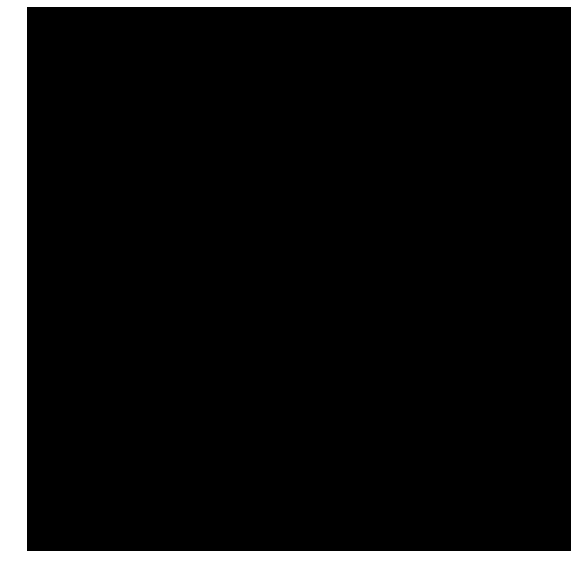

In [0]:
predictImage(")



# Test with Video

In [0]:
def predictVideo(videoDir):
  os.system(""" cd /content/darknet && ./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights \
  -dont_show {} -i 0 -out_filename res.avi
  """.format(videoDir))


In [0]:
predictVideo("/content/drive/'My Drive'/'Colab Notebooks'/licencePlateDetection/videos/test2.mp4")


In [0]:
files.download('res.avi')



In [0]:
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show /content/drive/'My Drive'/'Colab Notebooks'/licencePlateDetection/videos/test2.mp4 -i 0 -out_filename res.avi

Demo
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
 